**The goal of this project is to compare various sampling or non-sampling methods and models used, and find the sampling method and model with the highest accuracy.**

**During data processing, the normalization method is used.**



**The five machine learning methods are:**
1.   Logistic Regression
2.   Decision Tree
3.   Random Forest
4.   SVM
5.   Simple Neural Network


# Week——1 Oversampling and undersampling and nosampling

**This week, my goal is to use five different models and three different sampling methods to train the model and find the sampling method with the highest accuracy among the three different sampling methods.**

## library load

Import necessary libraries and linked datasets

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## oversampling(result = results1)

**The sampling method used in result 1 here: oversampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X1 = data.iloc[:, 1:]
y1 = data.iloc[:, 0]

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X1_normalized = scaler.fit_transform(X1)

**Step 3: Instantiate the oversampler.**

In [ ]:
ros = RandomOverSampler(random_state=42, sampling_strategy='auto')
X1_res, y1_res = ros.fit_resample(X1, y1)

Step 4: Divide the training set and test set.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_res, y1_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Simple Neural Network": MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results1 = {}
for name, model in models.items():
    model.fit(X1_train, y1_train)
    predictions = model.predict(X1_test)
    accuracy = accuracy_score(y1_test, predictions)
    results1[name] = accuracy

results_oversampling = results1

print(results_oversampling)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.912467976088813, 'Decision Tree': 0.8848206660973527, 'Random Forest': 0.9702177625960717, 'SVM': 0.979931682322801, 'Simple Neural Network': 0.9631725021349274}


Step 7: Plot a histogram of accuracy.

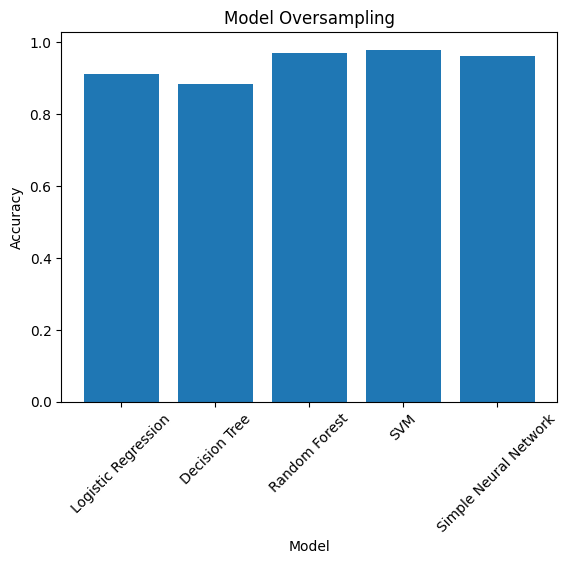

In [ ]:
plt.bar(results1.keys(), results1.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Oversampling')
plt.show()

## undersampling(result = results2)

**The sampling method used in result 2 here: undersampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X2 = data.iloc[:, 1:]
y2 = data.iloc[:, 0]

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X2_normalized = scaler.fit_transform(X2)

**Step 3: Instantiate the undersampler.**

In [ ]:
rus = RandomUnderSampler(random_state=42, replacement=False, sampling_strategy='auto')
X2_res, y2_res = rus.fit_resample(X2, y2)

Step 4: Divide the training set and test set.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_res, y2_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Simple Neural Network": MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results2 = {}
for name, model in models.items():
    model.fit(X2_train, y2_train)
    predictions = model.predict(X2_test)
    accuracy = accuracy_score(y2_test, predictions)
    results2[name] = accuracy

results_undersampling = results2

print(results_undersampling)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8931488801054018, 'Decision Tree': 0.8567852437417655, 'Random Forest': 0.9654808959156785, 'SVM': 0.9753623188405797, 'Simple Neural Network': 0.9496706192358366}


Step 7: Plot a histogram of accuracy.

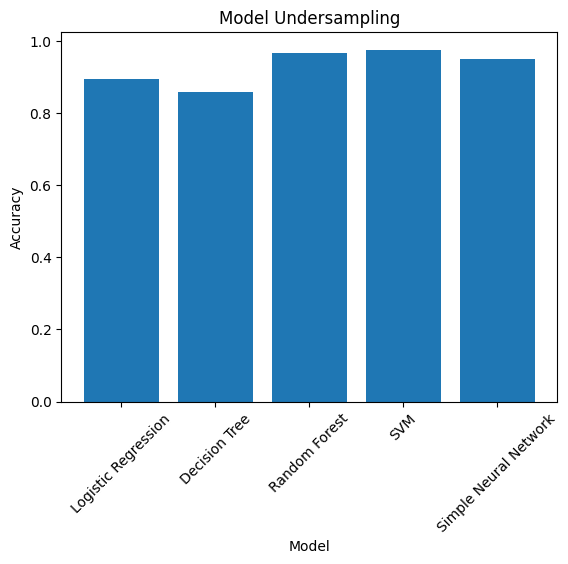

In [ ]:
plt.bar(results2.keys(), results2.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Undersampling')
plt.show()

## nosampling(result = results3)

**The sampling method used in result 3 here: no sampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X3 = data.iloc[:, 1:].values
y3 = data.iloc[:, 0].values

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X3_normalized = scaler.fit_transform(X3)

Step 3: Divide the training set and test set.

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

Step 4: Initialize five models.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Simple Neural Network': MLPClassifier(max_iter=1000)
}

Step 5: Use the models and print the accuracy of each model.

In [ ]:
results3 = {}
for name, model in models.items():
    model.fit(X3_train, y3_train)
    predictions = model.predict(X3_test)
    accuracy = accuracy_score(y3_test, predictions)
    results3[name] = accuracy

results_no_balancing = results3

print(results_no_balancing)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9008333333333334, 'Decision Tree': 0.8559523809523809, 'Random Forest': 0.9632142857142857, 'SVM': 0.973452380952381, 'Simple Neural Network': 0.9576190476190476}


Step 6: Plot a histogram of accuracy.

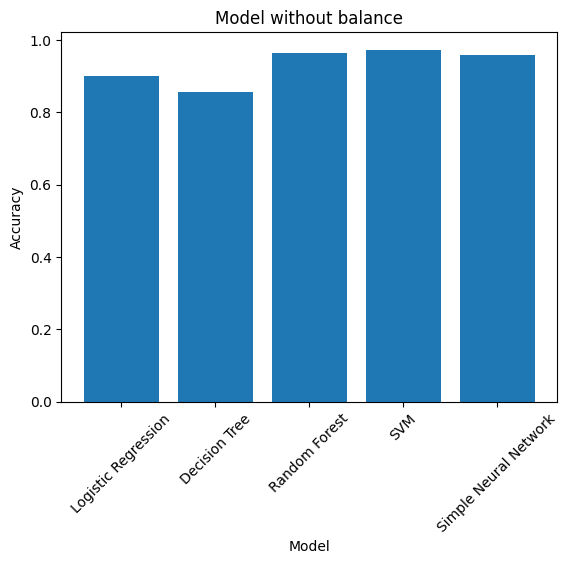

In [ ]:
plt.bar(results3.keys(), results3.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model without balance')
plt.show()

## Data comparison

Here, I put the accuracy rates obtained by using five machine learning models from three different sampling methods into the same picture, so that the different accuracy rates can be obtained more intuitively.

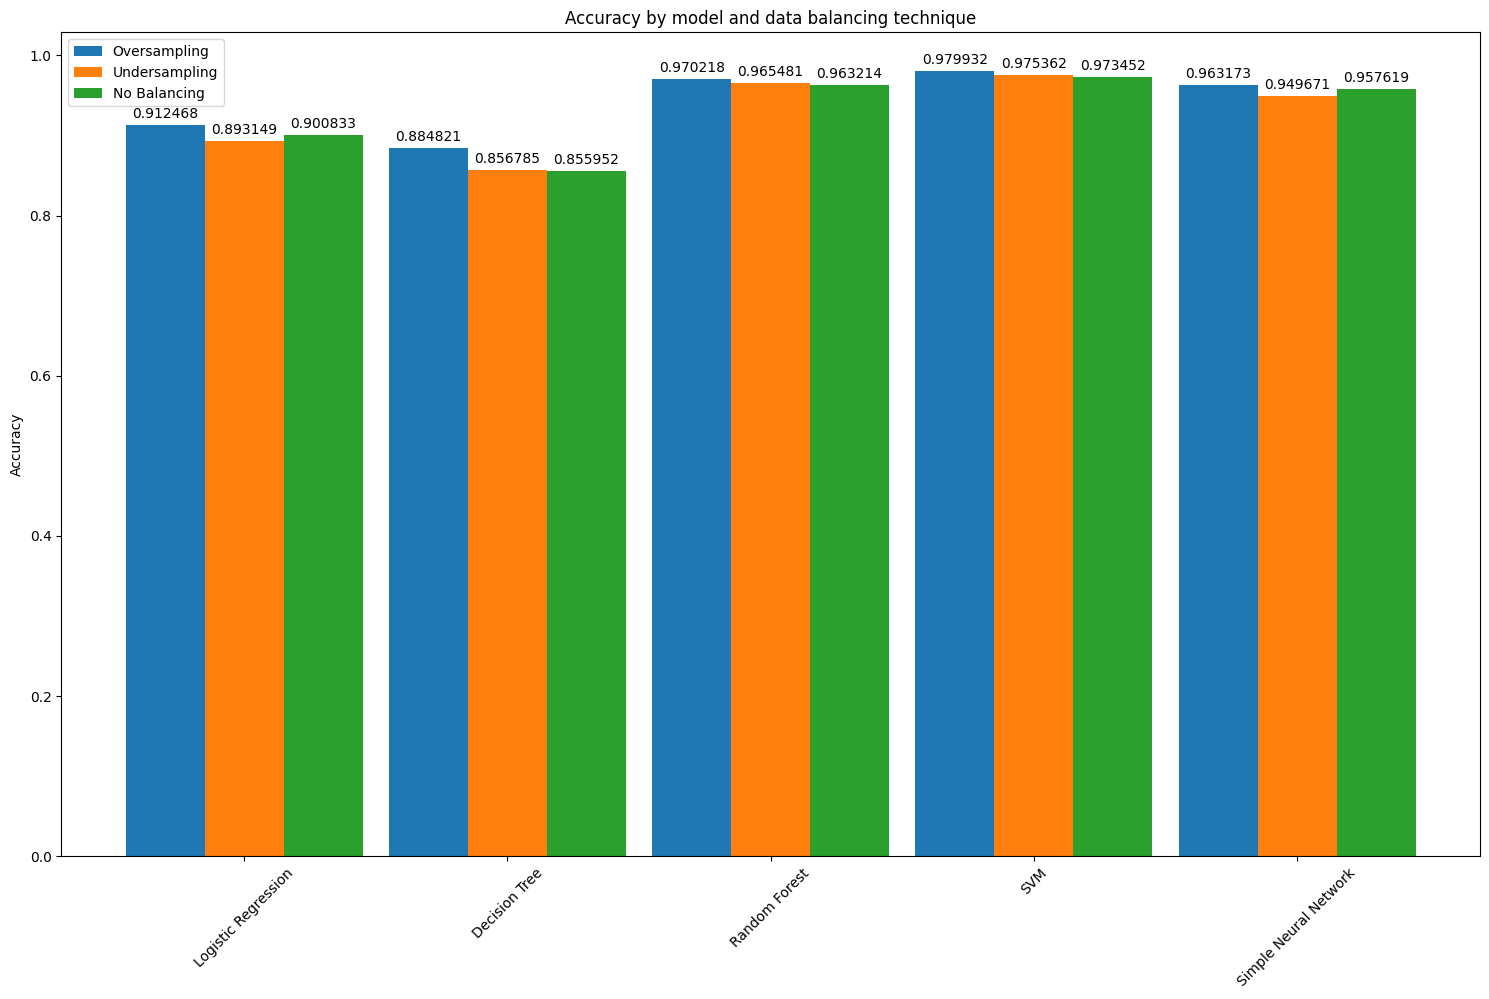

In [ ]:
labels = list(results_oversampling.keys())
oversampling_values = list(results_oversampling.values())
undersampling_values = list(results_undersampling.values())
no_balancing_values = list(results_no_balancing.values())

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 9))
rects1 = ax.bar(x - width, oversampling_values, width, label='Oversampling')
rects2 = ax.bar(x, undersampling_values, width, label='Undersampling')
rects3 = ax.bar(x + width, no_balancing_values, width, label='No Balancing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by model and data balancing technique')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()

**Through the pictures, I found that in the oversampling method, the accuracy of all models is the highest, so I will further optimize the oversampling method in the next step.**

# 2.Week——2 Random oversampling and SMOTE oversampling

**This week, my goal is to compare the accuracy of two different oversampling methods on five machine learning models and find the one with the highest accuracy:**

1.   Random oversampling
2.   SMOTE oversampling




Import the libraries that need to use in this study.

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

## random oversampling(result = results4)

**The sampling method used in result 4 here: random oversampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X4 = data.iloc[:, 1:].values
y4 = data.iloc[:, 0].values

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X4_normalized = scaler.fit_transform(X4)

**Step 3: Instantiate the random oversampler.**

In [ ]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='auto')
X4_res, y4_res = rus.fit_resample(X4, y4)

Step 4: Divide the training set and test set.

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_res, y4_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Simple Neural Network': MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results4 = {}
for name, model in models.items():
    model.fit(X4_train, y4_train)
    predictions = model.predict(X4_test)
    accuracy = accuracy_score(y4_test, predictions)
    results4[name] = accuracy

random_oversampling = results4

print(random_oversampling)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8931488801054018, 'Decision Tree': 0.8573122529644269, 'Random Forest': 0.9629776021080368, 'SVM': 0.9753623188405797, 'Simple Neural Network': 0.9573122529644269}


Step 7: Plot a histogram of accuracy.

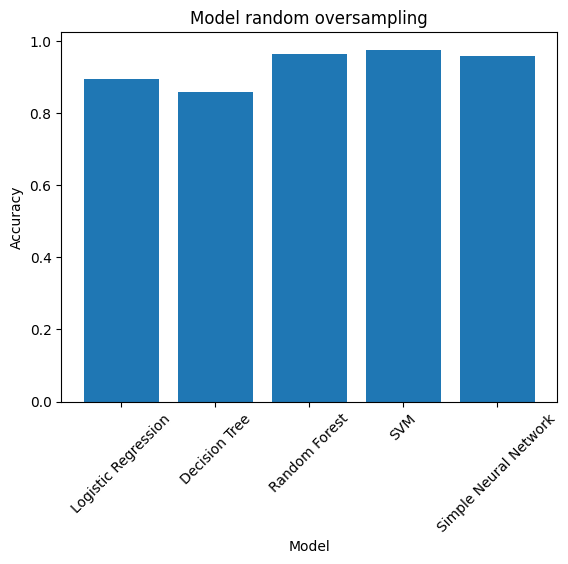

In [ ]:
plt.bar(results4.keys(), results4.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model random oversampling')
plt.show()

## SMOTE oversampling(result = results5)

**The sampling method used in result 5 here: SMOTE oversampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X5 = data.iloc[:, 1:].values
y5 = data.iloc[:, 0].values

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X5_normalized = scaler.fit_transform(X5)

**Step 3: Instantiate the SMOTE oversampler.**

In [ ]:
smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
X5_res, y5_res = smote.fit_resample(X5, y5)

Step 4: Divide the training set and test set.

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5_res, y5_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Simple Neural Network': MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results5 = {}
for name, model in models.items():
    model.fit(X5_train, y5_train)
    predictions = model.predict(X5_test)
    accuracy = accuracy_score(y5_test, predictions)
    results5[name] = accuracy

SMOTE_oversampling = results5

print(SMOTE_oversampling)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9133219470538002, 'Decision Tree': 0.8778821520068317, 'Random Forest': 0.9712852263023057, 'SVM': 0.9807856532877882, 'Simple Neural Network': 0.966268146883006}


Step 7: Plot a histogram of accuracy.

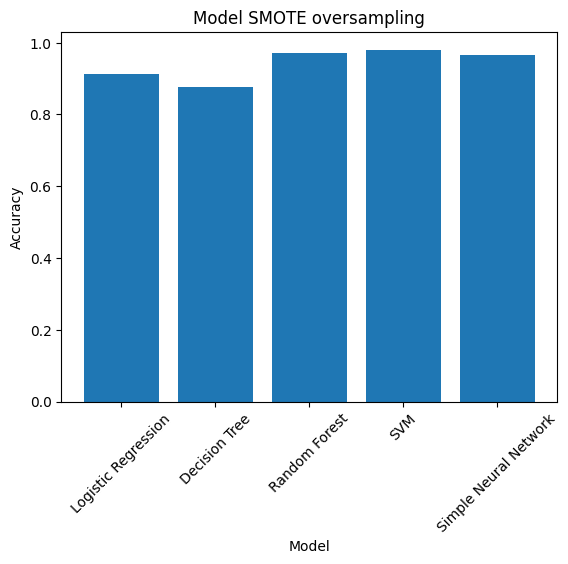

In [ ]:
plt.bar(results5.keys(), results5.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model SMOTE oversampling')
plt.show()

## Data comparison

Here, I put the accuracy of the random oversampling method and the SMOTE oversampling method in five machine learning models in one picture, so that the accuracy can be better compared.

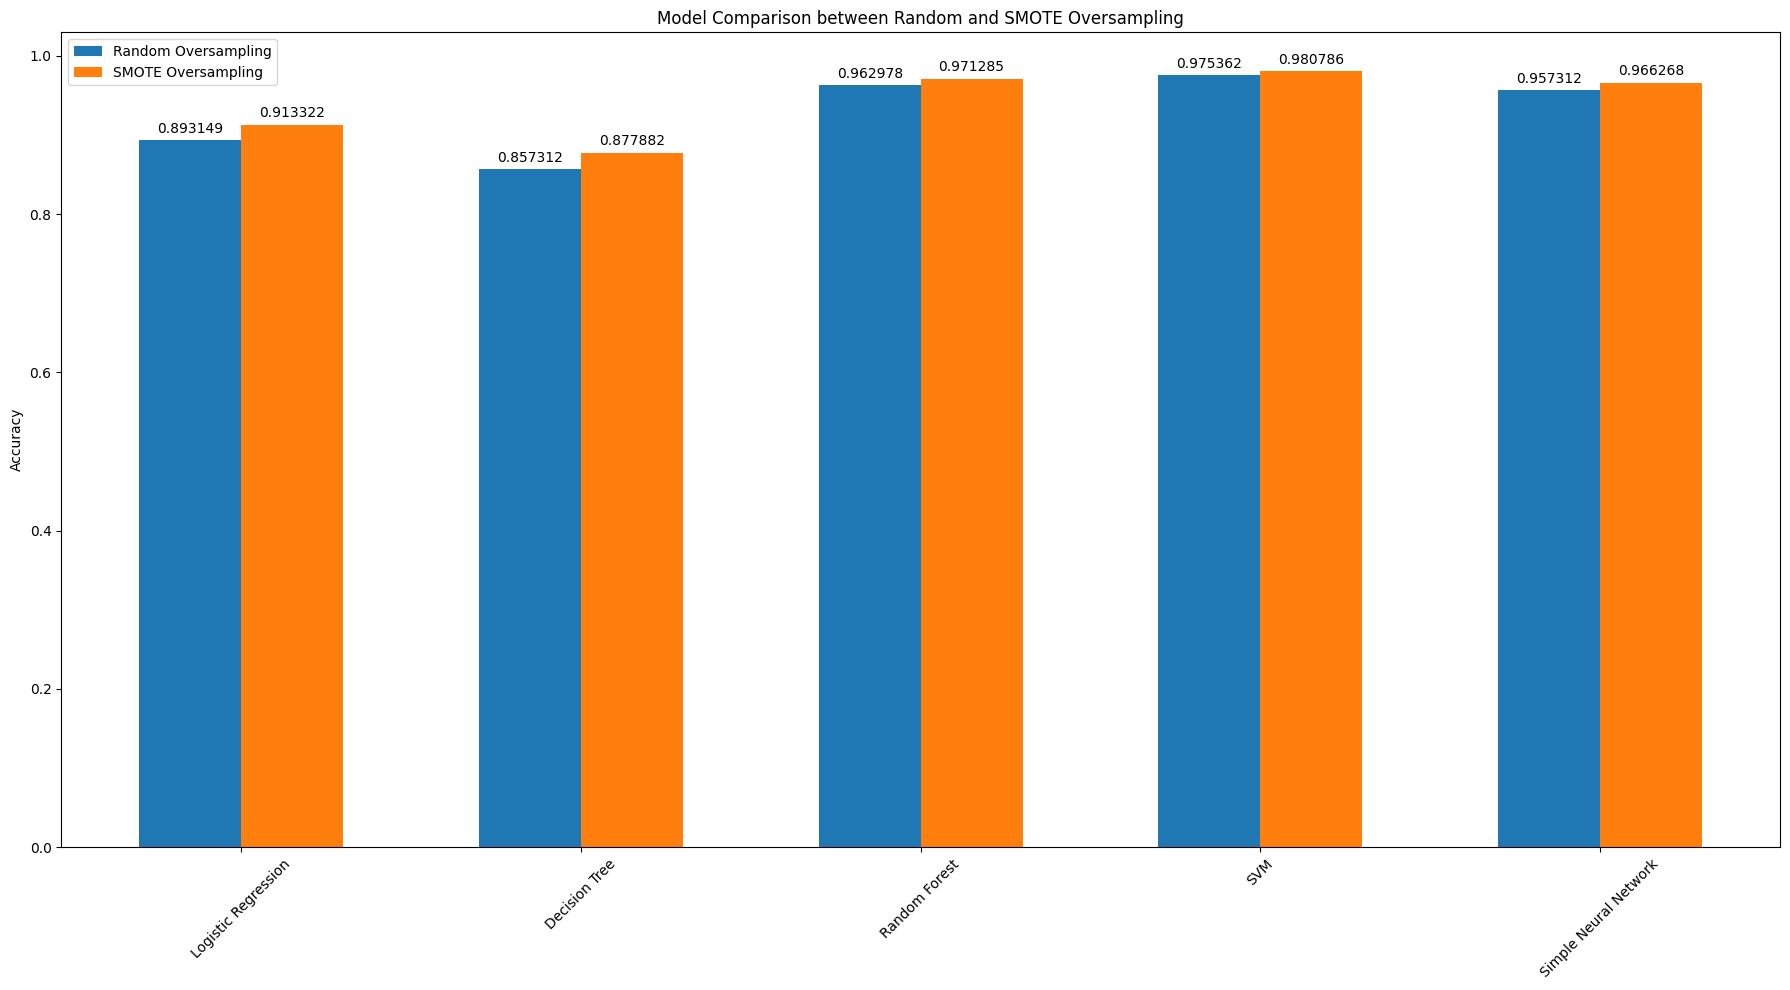

In [ ]:
labels = list(results4.keys())
random_values = list(results4.values())
smote_values = list(results5.values())

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(x - width/2, random_values, width, label='Random Oversampling')
rects2 = ax.bar(x + width/2, smote_values, width, label='SMOTE Oversampling')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison between Random and SMOTE Oversampling')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**By comparison, it can be found that the SMOTE oversampling method has a higher accuracy on any model than the random oversampling method. Therefore, the next step is to find ways to improve SMOTE to improve accuracy.**

# 3.Week——3 SMOTE and Borderline-SMOTE

## SMOTE (result = results6)

**The sampling method used in result 6 here: SMOTE oversampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X6 = data.iloc[:, 1:].values
y6 = data.iloc[:, 0].values

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X6_normalized = scaler.fit_transform(X6)

**Step 3: Instantiate the SMOTE oversampler.**

In [ ]:
smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=5)
X6_res, y6_res = smote.fit_resample(X6, y6)

Step 4: Divide the training set and test set.

In [ ]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6_res, y6_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Simple Neural Network': MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results6 = {}
for name, model in models.items():
    model.fit(X6_train, y6_train)
    predictions = model.predict(X6_test)
    accuracy = accuracy_score(y6_test, predictions)
    results6[name] = accuracy

SMOTE = results6

print(SMOTE)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9133219470538002, 'Decision Tree': 0.8812980358667806, 'Random Forest': 0.9703245089666951, 'SVM': 0.9807856532877882, 'Simple Neural Network': 0.9660546541417592}


Step 7: Plot a histogram of accuracy.

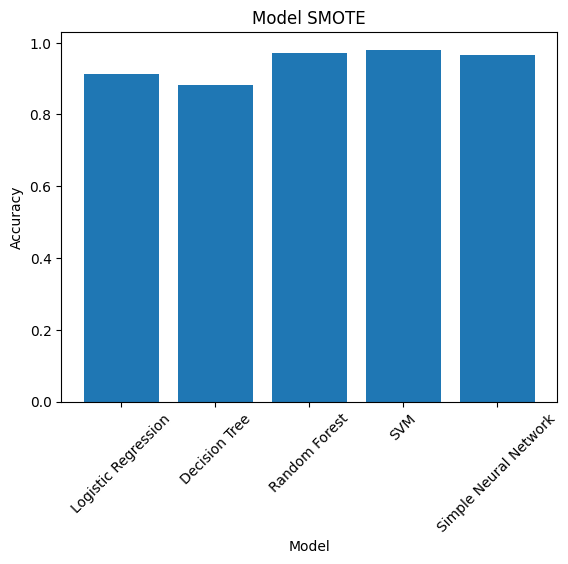

In [ ]:
plt.bar(results6.keys(), results6.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model SMOTE')
plt.show()

## Borderline-SMOTE(result = results7)

**The sampling method used in result 7 here: B-SMOTE oversampling**

Step 1: Import the data and divide the feature columns and label columns.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/研究生一年级下学期/机器学习/train.csv')
X7 = data.iloc[:, 1:].values
y7 = data.iloc[:, 0].values

Step 2: Process the data using normalization.

In [ ]:
scaler = MinMaxScaler()
X7_normalized = scaler.fit_transform(X7)

**Step 3: Instantiate the B-SMOTE oversampler.**

In [ ]:
smote = BorderlineSMOTE(random_state=42, k_neighbors=5, m_neighbors=10, kind='borderline-1', sampling_strategy='auto')
X7_res, y7_res = smote.fit_resample(X7, y7)

Step 4: Divide the training set and test set.

In [ ]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7_res, y7_res, test_size=0.2, random_state=42)

Step 5: Initialize five models.

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Simple Neural Network': MLPClassifier(max_iter=1000)
}

Step 6: Use the models and print the accuracy of each model.

In [ ]:
results7 = {}
for name, model in models.items():
    model.fit(X7_train, y7_train)
    predictions = model.predict(X7_test)
    accuracy = accuracy_score(y7_test, predictions)
    results7[name] = accuracy

BorderlineSMOTE = results7

print(BorderlineSMOTE)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8959222886421861, 'Decision Tree': 0.8594150298889838, 'Random Forest': 0.9787574722459437, 'SVM': 0.9850555081127241, 'Simple Neural Network': 0.9758753202391118}


Step 7: Plot a histogram of accuracy.

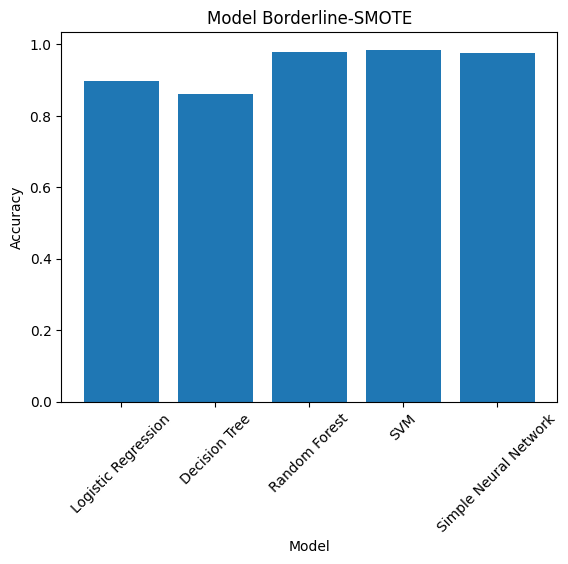

In [ ]:
plt.bar(results7.keys(), results7.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Borderline-SMOTE')
plt.show()

## Data comparison

Here, I put the accuracy of SMOTE oversampling and B-SMOTE oversampling methods in five machine learning models in the same picture to better compare the results.

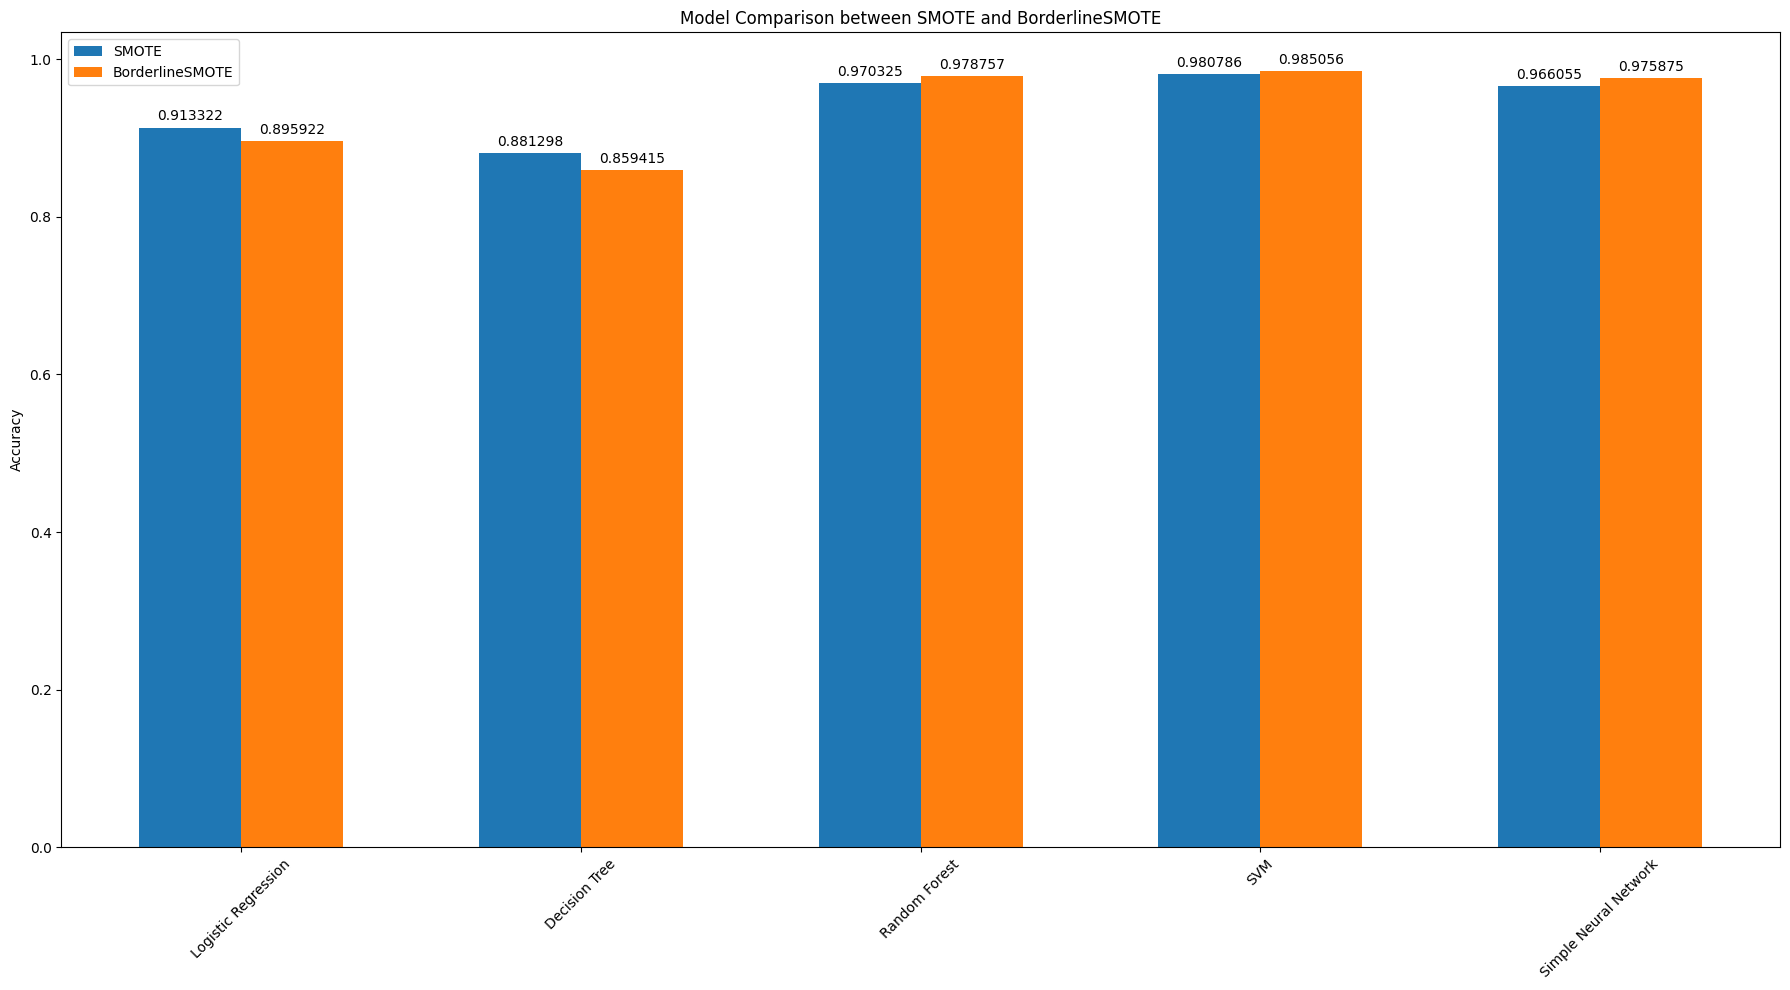

In [ ]:
labels = list(results6.keys())
SMOTE_values = list(results6.values())
BorderlineSMOTE_values = list(results7.values())

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(18, 10))
rects1 = ax.bar(x - width/2, SMOTE_values, width, label='SMOTE')
rects2 = ax.bar(x + width/2, BorderlineSMOTE_values, width, label='BorderlineSMOTE')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison between SMOTE and BorderlineSMOTE')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

**By comparison, it can be found that the B-SMOTE oversampling method has higher accuracy than the SMOTE oversampling method in random forests, SVM and simple neural networks. The B-SMOTE oversampling method has the highest accuracy among SVM models. The result is: when using the SVM model and using B-SMOTE as the sampling method, the accuracy of digital recognition is the highest.**